### <div style="text-align: right;"> Василий Ходаковский, v.e.khodakovsky@gmail.com </div>

# Вступительное задание для мастерской ТекстАн в Летней Школе

## Задача 1: ЛИНГВИСТИКА

#### Условия: <br>
Бильба и Больба берут за основу слово "ЛИНГВИСТИКА", а затем составляют слова из пяти букв, взятых из этого слова
(необязательно существующие). <br>
Правило Бильбы - все буквы должны быть уникальными. <br>
Правило Больбы - 2 и 4 буквы в придуманном слове должны быть гласными.

#### Выяснить вероятность успеха, если: <br>
а) Они оба не знают правил составления слов товарища по игре. <br>
б) Если Бильбе известны правила Больбы, а Больба остается в неведении

#### Правила Бильбы

In [1]:
import math

In [2]:
unique_letters = list(set("ЛИНГВИСТИКА"))
print(f'Уникальные буквы слова "ЛИНГВИСТИКА": {unique_letters}')

Уникальные буквы слова "ЛИНГВИСТИКА": ['Т', 'В', 'Л', 'И', 'А', 'Н', 'К', 'Г', 'С']


Для своего слова, Бильба из 9 уникальных букв выше выбирает 5.

In [3]:
combinations = math.comb(len(unique_letters), 5) 
print(f'Количество способов выбрать 5 букв из 9: {combinations}')
permutations = math.perm(5)
print(f'Количество возможных перестановок: {permutations}')

Количество способов выбрать 5 букв из 9: 126
Количество возможных перестановок: 120


In [4]:
num_bilba_words = combinations * permutations
print(f"Количество возможных слов Бильбы: {num_bilba_words}")

Количество возможных слов Бильбы: 15120


#### Правила Больбы

In [5]:
letters = list("ЛИНГВИСТИКА")
print(f'Буквы слова "ЛИНГВИСТИКА": {letters}')

vowels = [char for char in letters if char in "ИА"]
print(f'Гласные слова "ЛИНГВИСТИКА": {vowels}')

consonants = [char for char in letters if char not in vowels]
print(f'Согласные слова "ЛИНГВИСТИКА": {consonants}')

Буквы слова "ЛИНГВИСТИКА": ['Л', 'И', 'Н', 'Г', 'В', 'И', 'С', 'Т', 'И', 'К', 'А']
Гласные слова "ЛИНГВИСТИКА": ['И', 'И', 'И', 'А']
Согласные слова "ЛИНГВИСТИКА": ['Л', 'Н', 'Г', 'В', 'С', 'Т', 'К']


In [6]:
vowel_pairs = [('И', 'И'), ('И', 'А'), ('А', 'И')]
print(f"Пары гласных: {vowel_pairs}")

Пары гласных: [('И', 'И'), ('И', 'А'), ('А', 'И')]


Для своего слова, Больба выбирает комбинации ИИ, ИА или АИ в качестве второй и четвертых букв соответственно; <br>
В качестве первой, третьей и пятой букв, он выбирает случайные согласные.

In [7]:
num_consonant_combinations = math.perm(len(consonants), 3)
print(f"Количество способов комбинировать согласные: {num_consonant_combinations}")

Количество способов комбинировать согласные: 210


In [8]:
num_possible_words_bolba = num_consonant_combinations * len(vowel_pairs)

print(f"Общее количество возможных слов Больбы: {num_possible_words_bolba}")

Общее количество возможных слов Больбы: 630


### Решение А: Оба участника не знают правил друг друга

Для того, чтобы посчитать, с какой вероятностью Бильба и Больба загадают одно и то же слово, сначала нужно подсчитать, с какой вероятностью они загадают те слова, которые находятся в "банках слов" у обеих участников. <br>
У Бильбы это 15120 слов, в каждом из которых все буквы - уникальные. У Больбы - 630 слов, в каждом из которых на 2 и 4 позиции стоят гласные. Требованиям обоих участников соответствуют 420 слов, в которых все буквы уникальные, а на 2 и 4 позициях стоят гласные (сочетания АИ, ИА).

In [9]:
prob1a = (420/630 * 420/15120)
print('Вероятность того, что Бильба и Больба оба загадают слово из общего "банка слов":', prob1a)

Вероятность того, что Бильба и Больба оба загадают слово из общего "банка слов": 0.018518518518518517


Теперь, посчитаем, с какой вероятностью они загадают одно и то же слово, при условии, что они загадывают слова из общего "банка слов".

In [10]:
prob1b = 1/(420*420)
print('Вероятность того, что Бильба и Больба загадают одно и то же слово из общего "банка слов":', prob1b)

Вероятность того, что Бильба и Больба загадают одно и то же слово из общего "банка слов": 5.668934240362812e-06


И наконец - посчитаем вероятность того, что Бильба и Больба загадают одно и то же слово, при условии, что не знают правил друг друга.

In [11]:
prob1 = prob1a * prob1b
print(f"Вероятность загадать одно и то же слово при варианте А: {prob1}")

Вероятность загадать одно и то же слово при варианте А: 1.0498026371042243e-07


### Решение Б: Бильба знает правила Больбы, а Больба остается в неведении

В этом случае, если Бильба знает правила Больбы (о том, что на 2 и 4 позициях в слове должны стоять гласные), Бильба будет выбирать только такие слова. Вместе с тем, он не отступает от своего правила об уникальности всех букв в слове, а значит не будет загадывать слова, содержащие комбинацию ИИ на 2 и 4 позициях. <br>
Таким образом, из 630 слов, которые может загадать Больба, в "банке слов" у Бильбы будет лишь 420 слов.

In [12]:
num_combinations2 = 420 * 630
prob2 = 1/num_combinations2
print(f"Вероятность загадать одно и то же слово при варианте Б: 1/{num_combinations2}, или {prob2}")

Вероятность загадать одно и то же слово при варианте Б: 1/264600, или 3.7792894935752077e-06


## Задача 2: Лесной твиттер

In [13]:
import numpy as np
import pandas as pd

### Загрузка файлов

In [14]:
dub1 = pd.read_csv('C:/Users/Vasily/Downloads/Telegram Desktop/tweeter_dub1.csv', sep = ';', index_col = None)
print(dub1.head())

  Автор поста Вид автора поста  \
0      Никита             Заяц   
1       Алиса              Лис   
2       Костя          Воробей   
3       Мария              Лис   
4       Ольга             Енот   

                                         текст поста дата поста  
0  Вчера в лесу прошел забавный конкурс на лучшее...  26/8/2024  
1  Сегодня встретил в лесу стайку воробьев, котор...   2/8/2024  
2  Сегодня встретил в лесу воробьев, радостно чир...   2/6/2024  
3  Утром услышал звуки выстрелов охотников. Пора ...   4/8/2024  
4  Утром наблюдал за игрой белок на поляне. Они б...  19/7/2024  


In [15]:
dub2 = pd.read_csv('C:/Users/Vasily/Downloads/Telegram Desktop/tweeter_dub2.csv', sep = ';', index_col = None)
print(dub2.head())

  Автор поста Вид автора поста  \
0     Дмитрий           Синица   
1       Алиса              Лис   
2       Ольга            Белка   
3       Мария              Лис   
4       Ольга             Заяц   

                                         текст поста дата поста  
0  На прогулке обнаружил поляну, покрытую цветами...  29/8/2024  
1  Сегодня в лесу встретил странную стрекозу, кот...  21/8/2024  
2  Эти наглые люди считают, что лес принадлежит и...  23/8/2024  
3  На утренней зарядке заметил, что деревья начал...  11/6/2024  
4  Сегодня встретил в лесу одинокого сокола, сидя...   6/7/2024  


### Анализ тональности

Создадим два списка: положительных и отрицательных слов.
Так как нам нужно подсчитывать тональности вне зависимости от форм слова, в списках будут представлены только основы слов.

In [16]:
positive_words = ['хорош', 'спасибо', 'радостн', 'вкусн', 'забавн', 'мил', 'уютн', 
                  'весел', 'мелодичн', 'свободн', 'ласков', 'впечатляющ', 'талантлив', 'интересн', 'надежд']

In [17]:
def count_positive_words(text):
    count = 0
    for word in text.split():
        word_lower = word.lower()
        for positive_word in positive_words:
            if word.startswith(positive_word):
                count += 1
    return count

In [18]:
negative_words = ['ненавистн', 'безответственн', 'дик', 'наказани', 'жестокост', 'убийств', 
                  'бед', 'виновн', 'варварств', 'грустно', 'печально', 'плох', 'фейк', 'безжалостн']

In [19]:
def count_negative_words(text):
    count = 0
    for word in text.split():
        word_lower = word.lower()
        for negative_word in negative_words:
            if word.startswith(negative_word):
                count -= 1
    return count

###### Дуб 1

In [20]:
dub1['тональность'] = 0
print(dub1.head())

  Автор поста Вид автора поста  \
0      Никита             Заяц   
1       Алиса              Лис   
2       Костя          Воробей   
3       Мария              Лис   
4       Ольга             Енот   

                                         текст поста дата поста  тональность  
0  Вчера в лесу прошел забавный конкурс на лучшее...  26/8/2024            0  
1  Сегодня встретил в лесу стайку воробьев, котор...   2/8/2024            0  
2  Сегодня встретил в лесу воробьев, радостно чир...   2/6/2024            0  
3  Утром услышал звуки выстрелов охотников. Пора ...   4/8/2024            0  
4  Утром наблюдал за игрой белок на поляне. Они б...  19/7/2024            0  


In [21]:
dub1['тональность'] += dub1['текст поста'].apply(count_positive_words)

print(dub1.head())

  Автор поста Вид автора поста  \
0      Никита             Заяц   
1       Алиса              Лис   
2       Костя          Воробей   
3       Мария              Лис   
4       Ольга             Енот   

                                         текст поста дата поста  тональность  
0  Вчера в лесу прошел забавный конкурс на лучшее...  26/8/2024            1  
1  Сегодня встретил в лесу стайку воробьев, котор...   2/8/2024            1  
2  Сегодня встретил в лесу воробьев, радостно чир...   2/6/2024            1  
3  Утром услышал звуки выстрелов охотников. Пора ...   4/8/2024            0  
4  Утром наблюдал за игрой белок на поляне. Они б...  19/7/2024            1  


In [22]:
dub1['тональность'] += dub1['текст поста'].apply(count_negative_words)

print(dub1.head())

  Автор поста Вид автора поста  \
0      Никита             Заяц   
1       Алиса              Лис   
2       Костя          Воробей   
3       Мария              Лис   
4       Ольга             Енот   

                                         текст поста дата поста  тональность  
0  Вчера в лесу прошел забавный конкурс на лучшее...  26/8/2024            1  
1  Сегодня встретил в лесу стайку воробьев, котор...   2/8/2024            1  
2  Сегодня встретил в лесу воробьев, радостно чир...   2/6/2024            1  
3  Утром услышал звуки выстрелов охотников. Пора ...   4/8/2024            0  
4  Утром наблюдал за игрой белок на поляне. Они б...  19/7/2024            1  


###### Дуб 2

In [23]:
dub2['тональность'] = 0
print(dub2.head())

  Автор поста Вид автора поста  \
0     Дмитрий           Синица   
1       Алиса              Лис   
2       Ольга            Белка   
3       Мария              Лис   
4       Ольга             Заяц   

                                         текст поста дата поста  тональность  
0  На прогулке обнаружил поляну, покрытую цветами...  29/8/2024            0  
1  Сегодня в лесу встретил странную стрекозу, кот...  21/8/2024            0  
2  Эти наглые люди считают, что лес принадлежит и...  23/8/2024            0  
3  На утренней зарядке заметил, что деревья начал...  11/6/2024            0  
4  Сегодня встретил в лесу одинокого сокола, сидя...   6/7/2024            0  


In [24]:
dub2['тональность'] += dub2['текст поста'].apply(count_positive_words)

print(dub2.head())

  Автор поста Вид автора поста  \
0     Дмитрий           Синица   
1       Алиса              Лис   
2       Ольга            Белка   
3       Мария              Лис   
4       Ольга             Заяц   

                                         текст поста дата поста  тональность  
0  На прогулке обнаружил поляну, покрытую цветами...  29/8/2024            0  
1  Сегодня в лесу встретил странную стрекозу, кот...  21/8/2024            0  
2  Эти наглые люди считают, что лес принадлежит и...  23/8/2024            0  
3  На утренней зарядке заметил, что деревья начал...  11/6/2024            0  
4  Сегодня встретил в лесу одинокого сокола, сидя...   6/7/2024            0  


In [25]:
dub2['тональность'] += dub2['текст поста'].apply(count_negative_words)

print(dub2.head())

  Автор поста Вид автора поста  \
0     Дмитрий           Синица   
1       Алиса              Лис   
2       Ольга            Белка   
3       Мария              Лис   
4       Ольга             Заяц   

                                         текст поста дата поста  тональность  
0  На прогулке обнаружил поляну, покрытую цветами...  29/8/2024            0  
1  Сегодня в лесу встретил странную стрекозу, кот...  21/8/2024            0  
2  Эти наглые люди считают, что лес принадлежит и...  23/8/2024            0  
3  На утренней зарядке заметил, что деревья начал...  11/6/2024            0  
4  Сегодня встретил в лесу одинокого сокола, сидя...   6/7/2024            0  


### Задания

#### Задание 1: Определить, на каком из дубов в среднем более добрые посты

In [26]:
average_tone1 = dub1['тональность'].mean()

print("Средняя тональность у постов с первого дуба:", round(average_tone1, 3))

Средняя тональность у постов с первого дуба: 0.116


In [27]:
average_tone2 = dub2['тональность'].mean()

print("Средняя тональность у постов со второго дуба:", round(average_tone2, 3))

Средняя тональность у постов со второго дуба: 0.124


Как мы видим, средняя тональность постов у второго дуба больше, а значит - посты там добрее.

#### Задание 2: Для дуба, который в среднем менее добрый, определить количество дней, в которые его посты в среднем добрее

In [28]:
average_tone = dub1.groupby('дата поста')['тональность'].mean()

print(average_tone)

дата поста
1/6/2024     0.500000
1/8/2024    -0.666667
10/6/2024   -0.500000
10/7/2024    0.000000
10/8/2024    0.333333
               ...   
8/7/2024     0.000000
8/8/2024     0.250000
9/6/2024     0.000000
9/7/2024     0.500000
9/8/2024     0.000000
Name: тональность, Length: 83, dtype: float64


In [29]:
dub1['higher_than_average_tone1'] = dub1['тональность'] > average_tone1
days_higher = dub1['higher_than_average_tone1'].sum()

print(f"Средняя тональность у постов с первого дуба: {round(average_tone1, 3)}")
print(f"Количество дней, в которые тональность постов выше средней (т. е. посты добрее): {days_higher}")

Средняя тональность у постов с первого дуба: 0.116
Количество дней, в которые тональность постов выше средней (т. е. посты добрее): 61


#### Задание 3: Определить самый добрый вид животных для каждого из дубов и в целом

###### Самый добрый вид животных для первого дуба:

In [30]:
kindest_animal_dub1 = dub1.groupby('Вид автора поста')['тональность'].mean().idxmax()
max_tone_dub1 = dub1.groupby('Вид автора поста')['тональность'].mean().max()

print(f"Самый добрый вид животного на первом дубе - {kindest_animal_dub1}, имеющий тональность {round(max_tone_dub1, 3)}")

Самый добрый вид животного на первом дубе - Енот, имеющий тональность 0.333


###### Самый добрый вид животных для второго дуба:

In [31]:
kindest_animal_dub2 = dub2.groupby('Вид автора поста')['тональность'].mean().idxmax()
max_tone_dub2 = dub2.groupby('Вид автора поста')['тональность'].mean().max()

print(f"Самый добрый вид животного на втором дубе - {kindest_animal_dub2}, имеющий тональность {round(max_tone_dub2, 3)}")

Самый добрый вид животного на втором дубе - Олень, имеющий тональность 0.409


###### Самый добрый вид животных в целом:

In [32]:
duby = pd.concat([dub1, dub2])

kindest_animal_duby = duby.groupby('Вид автора поста')['тональность'].mean().idxmax()
max_tone_duby = duby.groupby('Вид автора поста')['тональность'].mean().max()

print(f"Самый добрый вид животного в целом - {kindest_animal_duby}, имеющий тональность {round(max_tone_duby, 3)}")

Самый добрый вид животного в целом - Олень, имеющий тональность 0.286


## Задача 3: Roll Initiative

Необходимо вычислить математическое ожидание и стандартное отклонение результатов броска двадцатигранного кубика.

###### Результаты бросков

In [33]:
import matplotlib.pyplot as plt

In [34]:
results = [1]*70 + [2]*10 + [3]*10 + [4]*90 + [5]*60 + [6]*80 + [7]*40 + [8]*50 + [9]*20 + [10]*30 + [11]*40 + [12]*80 + [13]*40 + [14]*100 + [15]*70 + [16]*10 + [17]*30 + [18]*30 + [19]*80 + [20]*90
df = pd.DataFrame(results, columns=['results'])

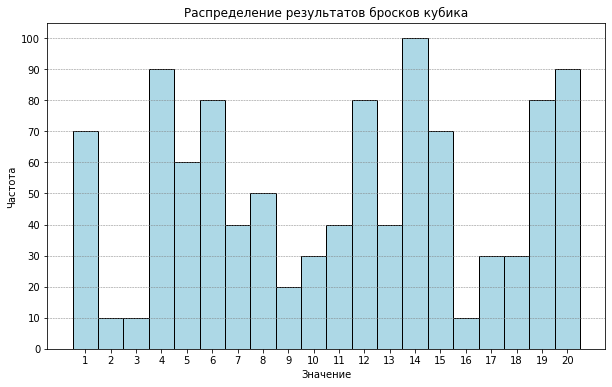

In [35]:
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(df['results'], bins=20, color='lightblue', edgecolor='black', align='mid')

plt.xlabel('Значение')
plt.ylabel('Частота')
plt.title('Распределение результатов бросков кубика')

bin_centers = 0.5 * (bins[1:] + bins[:-1])
plt.xticks(bin_centers, range(1, 21, 1))
plt.yticks(range(0, 101, 10))

for y_value in range(0, 101, 10):
    plt.axhline(y=y_value, color='gray', linestyle='--', linewidth=0.5)

plt.show()

##### Математическое ожидание

In [36]:
mean_result = df['results'].mean()
print(mean_result)

10.990291262135923


Кажется, Никиту никто не проклинал - математическое ожидание выше 10.

##### Стандартное отклонение

In [37]:
std_deviation = df['results'].std()
print(std_deviation)

5.889317874494709


## Задача 4: Wordle

In [38]:
import random
import re
import nltk
import colorama
from colorama import Fore, Back, Style

nltk.download('words')

from nltk.corpus import words as english_words

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Vasily\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [39]:
word_list = ["start", "stale"] # Сюда можно добавлять слова, случайное из которых программа загадает пользователю

In [41]:
def choose_word(word_list):
    return random.choice(word_list).upper()

def is_english_word(word):
    return word.lower() in english_words.words()

def get_color(chosen_word, guess):
    color_list = []
    used_indices = []
    for i in range(5):
        if guess[i] == chosen_word[i]:
            color_list.append(Fore.GREEN + guess[i] + Style.RESET_ALL)
            used_indices.append(i)
        else:
            found = False
            for j in range(5):
                if j not in used_indices and guess[i] == chosen_word[j]:
                    color_list.append(Fore.YELLOW + guess[i] + Style.RESET_ALL)
                    used_indices.append(j)
                    found = True
                    break
            if not found:
                color_list.append(Fore.LIGHTBLACK_EX + guess[i] + Style.RESET_ALL)
    return ' '.join(color_list)


def get_feedback(guess, target):
    feedback = [""] * 5
    target_letters = list(target)
    guess_letters = list(guess)

    correct_placement_indices = [i for i in range(5) if guess_letters[i] == target_letters[i]]
    for i in range(5):
        if i in correct_placement_indices:
            feedback[i] = f"{guess_letters[i]} стоит на правильном месте"
            target_letters[i] = None

    for i in range(5):
        if feedback[i] != "":
            continue
        if guess_letters[i] in target_letters:
            feedback[i] = f"{guess_letters[i]} есть, но стоит не там"
            target_letters[target_letters.index(guess_letters[i])] = None
        else:
            feedback[i] = f"{guess_letters[i]} отсутствует в слове"

    for i in range(5):
        print(f"{i + 1}. {feedback[i]}")

def play_game():
    target_word = choose_word(word_list)
    attempts = 0
    max_attempts = 6
    attempt_number = 1

    print("Угадайте пятибуквенное слово! У вас есть 6 попыток.")

    while attempts < max_attempts:
        print(f"\nПопытка {attempt_number}")
        guess = input("Ваше слово: ").strip().upper()

        if len(guess) != 5:
            print("Слово должно состоять из пяти букв.")
            continue

        if not re.match("^[A-Z]+$", guess):
            print("Слово должно содержать только буквы латинского алфавита.")
            continue

        if not is_english_word(guess):
            print("Такого слова не существует в английском языке.")
            continue

        colored_guess = get_color(target_word, guess)
        print(f"РЕЗУЛЬТАТ: {colored_guess}")

        get_feedback(guess, target_word)

        if guess == target_word:
            print("\nПоздравляем, вы выиграли!")
            return

        attempts += 1
        attempt_number += 1

    print(f"\nК сожалению, вы проиграли. Загаданное слово: {target_word}")

play_game()

Угадайте пятибуквенное слово! У вас есть 6 попыток.

Попытка 1
Ваше слово: apple
РЕЗУЛЬТАТ: A P P L E
1. A есть, но стоит не там
2. P отсутствует в слове
3. P отсутствует в слове
4. L стоит на правильном месте
5. E стоит на правильном месте

Попытка 2
Ваше слово: TaSTY
РЕЗУЛЬТАТ: T A S T Y
1. T есть, но стоит не там
2. A есть, но стоит не там
3. S есть, но стоит не там
4. T отсутствует в слове
5. Y отсутствует в слове

Попытка 3
Ваше слово: Privet
Слово должно состоять из пяти букв.

Попытка 3
Ваше слово: океан
Слово должно содержать только буквы латинского алфавита.

Попытка 3
Ваше слово: dfgdf
Такого слова не существует в английском языке.

Попытка 3
Ваше слово: steep
РЕЗУЛЬТАТ: S T E E P
1. S стоит на правильном месте
2. T стоит на правильном месте
3. E есть, но стоит не там
4. E отсутствует в слове
5. P отсутствует в слове

Попытка 4
Ваше слово: stale
РЕЗУЛЬТАТ: S T A L E
1. S стоит на правильном месте
2. T стоит на правильном месте
3. A стоит на правильном месте
4. L стоит на прав

# Спасибо за внимание!